# NSF Computer and Information Science and Engineering (CISE) 

- `0505****`: Division of Computer and Network Systems (CNS)
- `0501****`: Division of Computing and Communication Foundations (CCF)
- `0502****`: Division of Information and Intelligent Systems (IIS)
- `0509****`: Office of Advanced Cyberinfrastructure (OAC)

In [1]:
import os,sys,json
import core.coworknet, core.nsf_utils
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import networkx as nx
import seaborn as sns
import pandas as pd
from datetime import datetime
from collections import Counter

In [2]:
grant_type = ["Standard Grant", "Continuing grant"] # draw only these types
div_type = {
    "0505": "Division of Computer and Network Systems (CNS)",
    "0501": "Division of Computing and Communication Foundations (CCF)",
    "0502": "Division of Information and Intelligent Systems (IIS)",
    "0509": "Office of Advanced Cyberinfrastructure (OAC)"
}

In [3]:
data = {}
years = [2004]
for y in years:
    data.update(core.nsf_utils.load_numpub_data(y))
data = {k:v for k, v in data.items() if v["type"] in grant_type}
for y in years:
    print("[{}]".format(y))
    print("Total number of grants", len([v for v in data.values() if v["year"] == y]))
    for code, desc in div_type.items():
        print(desc, len([v for v in data.values() if v["org"][:4] == code and v["year"] == y]))

[2004]
Total number of grants 10212
Division of Computer and Network Systems (CNS) 413
Division of Computing and Communication Foundations (CCF) 349
Division of Information and Intelligent Systems (IIS) 365
Office of Advanced Cyberinfrastructure (OAC) 53


In [4]:
grant_list = [k for k, d in data.items() if d["org"][:4] in div_type.keys() and d["num_pis"] == 2]
print(grant_list)

['0401049', '0403020', '0403130', '0403590', '0404001', '0404011', '0404193', '0404297', '0404440', '0406305', '0406345', '0406384', '0410203', '0410246', '0410409', '0410524', '0410553', '0410771', '0410790', '0410918', '0410937', '0411127', '0411152', '0411307', '0412029', '0412858', '0412884', '0412894', '0412930', '0412965', '0413012', '0413078', '0413085', '0413138', '0413196', '0413214', '0413227', '0413251', '0413284', '0413321', '0413328', '0413709', '0414380', '0414409', '0414482', '0414557', '0414567', '0414630', '0414710', '0414762', '0414763', '0414791', '0414815', '0414976', '0414981', '0415016', '0415021', '0415101', '0415175', '0415195', '0415257', '0415865', '0415923', '0416364', '0417607', '0418165', '0420337', '0420434', '0420505', '0420866', '0420873', '0420906', '0420985', '0423014', '0423039', '0423070', '0423253', '0423305', '0423546', '0423584', '0424601', '0426021', '0426557', '0426627', '0426674', '0426879', '0426904', '0427260', '0427385', '0427695', '0428427'

In [5]:
grant_list = [k for k, d in data.items() if d["org"][:4] in div_type.keys() and d["num_pis"] == 2]
print(len(grant_list), "grants with 2 PIs")

246 grants with 2 PIs


In [6]:
no_publications = []
no_edges = []
other = []
only_one_pi = []
two_separate = []
two_cowork = []
for pid in grant_list:
    award, table, ts, te, G_all = core.coworknet.get_grant_coworknet_pis(pid)
    if len(table) == 0:
        no_publications.append(pid)
        continue
    pis = [a for a in G_all.nodes() if "pi" in G_all.nodes[a] and G_all.nodes[a] ["pi"]]
    G = G_all.subgraph(pis)
        
    working_pis = []
    reported_pub_number = 0
    for k, v in table.items():
        if v["type"]: # only count publicatoins in-grant
            reported_pub_number += 1
            working_pis.append([a for a, av in v["authors"].items() if av["pi"]])
    # print(pid, working_pis)
    pi_counter = [set([n[0]+n.split(" ")[-1] for n in group]) for group in working_pis]
    pi_union = set.union(*pi_counter)
    pi_max_group = max([len(pg) for pg in pi_counter])
#     print(pi_counter, pi_union, pi_max_group)
    print("{} union={}, max_group={}, numpub={} {} {}".format(pid, len(pi_union), pi_max_group, reported_pub_number, len(table), len(G.edges)))
    if len(pi_union) == 2 and pi_max_group == 2:
        two_cowork.append(pid)
    elif len(pi_union) == 2:
        two_separate.append(pid)
    elif len(pi_union) == 1:
        only_one_pi.append(pid)
    else:
        other.append(pid)
print("{} ({:.2f}%) grants have no publication".format(len(no_publications), 100*len(no_publications)/len(grant_list)))
print("{} ({:.2f}%) grants have only one working PI".format(len(only_one_pi), 100*len(only_one_pi)/len(grant_list)))
print("{} ({:.2f}%) grants have two PIs working separately".format(len(two_separate), 100*len(two_separate)/len(grant_list)))
print("{} ({:.2f}%) grants have two PIs collaborated".format(len(two_cowork), 100*len(two_cowork)/len(grant_list)))
print("{} ({:.2f}%) grants are unknown".format(len(other), 100*len(other)/len(grant_list)))

0401049 union=2, max_group=2, numpub=1 25 25
0404001 union=1, max_group=1, numpub=3 3 0
0404011 union=2, max_group=2, numpub=4 8 6
0404297 union=2, max_group=2, numpub=3 6 5
0406305 union=2, max_group=2, numpub=2 8 7
0406345 union=2, max_group=1, numpub=11 11 0
0410203 union=2, max_group=2, numpub=19 19 1
0410246 union=2, max_group=2, numpub=15 18 4
0410409 union=2, max_group=2, numpub=5 5 1
0410553 union=2, max_group=2, numpub=8 9 3
0410771 union=2, max_group=2, numpub=9 9 3
0410790 union=1, max_group=1, numpub=2 2 0
0410918 union=2, max_group=2, numpub=18 25 12
0410937 union=2, max_group=2, numpub=19 40 27
0411127 union=2, max_group=2, numpub=64 94 41
0411152 union=2, max_group=2, numpub=13 22 11
0411307 union=2, max_group=2, numpub=6 33 29
0412029 union=1, max_group=1, numpub=3 3 0
0412884 union=2, max_group=1, numpub=10 10 0
0412894 union=1, max_group=1, numpub=7 7 0
0412930 union=2, max_group=2, numpub=14 14 1
0412965 union=0, max_group=0, numpub=1 1 0
0413012 union=2, max_group=2

0455361 union=2, max_group=2, numpub=3 45 45
0455997 union=1, max_group=1, numpub=2 2 0
0455998 union=2, max_group=2, numpub=4 8 6
0456001 union=2, max_group=1, numpub=22 22 0
0456129 union=0, max_group=0, numpub=11 11 0
53 (21.54%) grants have no publication
46 (18.70%) grants have only one working PI
20 (8.13%) grants have two PIs working separately
115 (46.75%) grants have two PIs collaborated
12 (4.88%) grants are unknown


In [8]:
collab_type = {}
dict_period = {}
dict_amount = {}
dict_teams = {}
dict_publications = {}
dict_citations = {}
dict_affiliations = {}
dict_timestamps = {}
convert_t = lambda t: datetime.strptime(t, "%Y-%m-%dT%X")

for grant_id in grant_list:
    pi_affiliations = core.coworknet.get_pis_affiliation(grant_id)    
    affiliation_type = None
    if len(pi_affiliations.values()) != 2:
        print("*** num of PIs != 2", grant_id)
        affiliation_type = "unknown"
    else:
        a_aff, b_aff = pi_affiliations.values()
        if len(a_aff) == 0 or len(b_aff) == 0:
            affiliation_type = "unknown"
        elif len(set(a_aff).intersection(set(b_aff))) > 0:
            affiliation_type = "intersection"
            if set(a_aff) == set(b_aff):
                affiliation_type = "same"
        else:
            affiliation_type = "diff"
        print("***", grant_id, affiliation_type)
    dict_affiliations[grant_id] = affiliation_type
    
    award,_,ts,te,G_all = core.coworknet.get_grant_coworknet_pis(grant_id)
    pis = [a for a in G_all.nodes() if "pi" in G_all.nodes[a] and G_all.nodes[a] ["pi"]]
    G = G_all.subgraph(pis)
    
    publications = {"pre-grant":0, "grant":0, "post-grant":0}
    citations = {"pre-grant":0, "grant":0, "post-grant":0}
    teams = {"pre-grant":0, "grant":0, "post-grant":0}
    dates = [convert_t(data["date"]) for _,_,data in G.edges.data()]
    for u,v,data in G.edges.data():
#         print(data["paper"])
        num_coauthor = len([e for e in G_all.edges.data() if e[2]["paper"] == data["paper"]])/2
#         print(data["paper"], num_coauthor)
        if data["grant"] != "other" or (ts <= convert_t(data["date"]) and convert_t(data["date"]) <= te):
#             print("grant") # reported publications or unreported pubs in the grant period
            teams["grant"] += num_coauthor
            publications["grant"] += 1
            citations["grant"] += data["citation"]
        elif convert_t(data["date"]) < ts:
#             print("pre-grant") # unreported publications before the grant period
            teams["pre-grant"] += num_coauthor
            publications["pre-grant"] += 1
            citations["pre-grant"] += data["citation"]
        elif te < convert_t(data["date"]):
#             print("post-grant") # unreported publications after the grant period
            teams["post-grant"] += num_coauthor
            publications["post-grant"] += 1
            citations["post-grant"] += data["citation"]
    dict_period[grant_id] = (te-ts).days
    dict_amount[grant_id] = award["awardAmount"]
    dict_teams[grant_id] = teams
    dict_publications[grant_id] = publications
    dict_citations[grant_id] = citations
    dict_timestamps[grant_id] = sorted(dates)
#     print(publications, dict_timestamps[grant_id])
    
ctypes = []
for gid, v in dict_publications.items():
    collab_type[gid] = "{}{}{}".format(1 if v["pre-grant"]>0 else 0, 1 if v["grant"]>0 else 0, 1 if v["post-grant"]>0 else 0)
    ctypes.append(collab_type[gid])
    
print(len([k for k in dict_timestamps.keys() if collab_type[k] != "000"]), "grants - two PIs collaborated")
print(Counter(ctypes))

Rajeev Alur - Affiliations: {79576946}
George J. Pappas - Affiliations: {79576946}
*** 0401049 same
Andreas C. Cangellaris - Affiliations: {157725225}
[es_filter_papers_grant_range] no result
Narayan Aluru - Affiliations: set()
*** 0403020 unknown
[es_filter_papers_grant_range] no result
Alper Buldum - Affiliations: set()
[es_filter_papers_grant_range] no result
Liming Dai - Affiliations: set()
*** 0403130 unknown
Yehea Ismail - Affiliations: {111979921}
Venkat Chandrasekhar - Affiliations: {111979921}
*** 0403590 same
Min-Feng Yu - Affiliations: {157725225, 201448701}
Dong Qian - Affiliations: {63135867}
*** 0404001 diff
Sung Kyu Lim - Affiliations: {130701444}
Michael Niemier - Affiliations: {130701444, 95457486}
*** 0404011 intersection
[es_filter_papers_grant_range] no result
Jordan Poler - Affiliations: set()
[es_filter_papers_grant_range] no result
Thomas Dubois - Affiliations: set()
*** 0404193 unknown
Thomas R. Hoye - Affiliations: {130238516}
Richard A. Kiehl - Affiliations: {

Wanda J. Smith - Affiliations: {859038795}
*** 0418165 unknown
[es_filter_papers_grant_range] no result
Hubert E. Dunsmore - Affiliations: set()
Susanne E. Hambrusch - Affiliations: {219193219}
*** 0420337 unknown
Jeffrey M. Stanton - Affiliations: {70983195}
Debra Eischen - Affiliations: {70983195}
*** 0420434 same
Samuel N. Kamin - Affiliations: {157725225}
Tim L. Wentling - Affiliations: {157725225}
*** 0420505 same
Richard M. Stern - Affiliations: {74973139, 1290206253}
Rita Singh - Affiliations: {74973139}
*** 0420866 intersection
Henry M. Tufo - Affiliations: {188538660, 1282105669, 40347166, 107766831}
Xiao-Chuan Cai - Affiliations: {188538660}
*** 0420873 intersection
Pascal Meunier - Affiliations: {219193219}
Jan Vitek - Affiliations: {219193219}
*** 0420906 same
Jan Mandel - Affiliations: {188538660, 921990950, 107766831}
Andrew V. Knyazev - Affiliations: {921990950}
*** 0420985 intersection
Shambhu J. Upadhyaya - Affiliations: {63190737, 1327163397}
H. Raghav Rao - Affiliati

Timothy J. Cowles - Affiliations: {131249849}
[es_filter_papers_grant_range] no result
James Gallagher - Affiliations: set()
*** 0430822 unknown
Aniruddha R. Thakar - Affiliations: {145311948, 1290206253}
Randal C. Burns - Affiliations: {145311948}
*** 0430848 intersection
Erik D. Demaine - Affiliations: {126820664, 63966007}
John Iacono - Affiliations: {102322142, 57206974, 132053463}
*** 0430849 diff
Srinivas Aluru - Affiliations: {55732556, 173911158}
Patrick S. Schnable - Affiliations: {173911158}
*** 0430853 intersection
Yao Wang - Affiliations: {57206974}
Elza Erkip - Affiliations: {20089843, 57206974}
*** 0430885 intersection
Robert Egri - Affiliations: {1328728281}
[es_filter_papers_grant_range] no result
Dennis Goeckel - Affiliations: set()
*** 0430892 unknown
Louiqa Raschid - Affiliations: {174306211, 66946132}
Lise Getoor - Affiliations: {1282311441, 66946132, 1290206253}
*** 0430915 intersection
Eric Klassen - Affiliations: {103163165}
David C. Banks - Affiliations: {103163

Bonnie A. Nardi - Affiliations: {204250578}
[es_filter_papers_grant_range] no result
Ann Zimmerman - Affiliations: set()
*** 0438848 unknown
Olin Shivers - Affiliations: {12912129, 130701444}
Panagiotis Manolios - Affiliations: {130701444}
*** 0438871 intersection
Jeffrey C. Carver - Affiliations: {114772536, 17301866, 99041443, 66946132}
Julia E. Hodges - Affiliations: {99041443}
*** 0438923 intersection
[es_filter_papers_grant_range] no result
Donald Thomas - Affiliations: set()
[es_filter_papers_grant_range] no result
JoAnn Paul - Affiliations: set()
*** 0438948 unknown
[es_filter_papers_grant_range] no result
Jean-Pierre P. Langlois - Affiliations: set()
[es_filter_papers_grant_range] no result
Jane Veeder - Affiliations: set()
*** 0439034 unknown
[es_filter_papers_grant_range] no result
Zhensheng Zhang - Affiliations: set()
Jason P. Jue - Affiliations: {39815113, 86519309, 162577319}
*** 0439061 unknown
Raya Fidel - Affiliations: {201448701}
Jens-Erik Jørgensen - Affiliations: {20

### Affiliations of PIs in the grant period

Collab type: *0* -- ['same 23 (17.8%)', 'intersection 36 (27.9%)', 'diff 18 (14.0%)', 'unknown 52 (40.3%)']
Collab type: *1* -- ['same 41 (35.0%)', 'intersection 59 (50.4%)', 'diff 12 (10.3%)', 'unknown 5 (4.3%)']


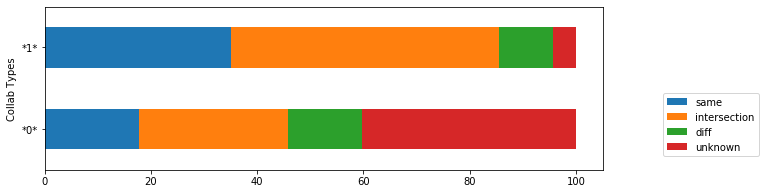

In [9]:
C = Counter(ctypes)
corder = ["*0*", "*1*"]
index = pd.Index(corder, name='Collab Types')
korder = ["same", "intersection", "diff", "unknown"]
data_c = {g:[] for g in korder}
for ct in corder:
    print("Collab type:", ct, end=" -- ")
    tlist = Counter([dict_affiliations[gid] for gid, t in collab_type.items() if t[1] == ct[1]])
    tnum = 0
    for c, v in C.items():
        if c[1] == ct[1]:
            tnum += v
    print(["{} {} ({:.1f}%)".format(k, tlist[k], 100*tlist[k]/tnum) for k in korder])
    for k in korder:
        data_c[k].append(100*tlist[k]/tnum)
df = pd.DataFrame(data_c, index=index)
ax = df.plot(kind='barh', stacked=True, figsize=(10, 3)).legend(bbox_to_anchor=(1.1, 0.5))

Collab type: 000 no_pub -- ['same 9 (17.0%)', 'intersection 4 (7.5%)', 'diff 9 (17.0%)', 'unknown 31 (58.5%)']
Collab type: 000 only_one -- ['same 7 (15.2%)', 'intersection 18 (39.1%)', 'diff 4 (8.7%)', 'unknown 17 (37.0%)']
Collab type: 000 two_sepa -- ['same 6 (30.0%)', 'intersection 13 (65.0%)', 'diff 1 (5.0%)', 'unknown 0 (0.0%)']
Collab type: 010 -- ['same 10 (38.5%)', 'intersection 10 (38.5%)', 'diff 4 (15.4%)', 'unknown 2 (7.7%)']
Collab type: 011 -- ['same 5 (26.3%)', 'intersection 12 (63.2%)', 'diff 1 (5.3%)', 'unknown 1 (5.3%)']
Collab type: 110 -- ['same 8 (36.4%)', 'intersection 12 (54.5%)', 'diff 1 (4.5%)', 'unknown 1 (4.5%)']
Collab type: 111 -- ['same 18 (36.0%)', 'intersection 25 (50.0%)', 'diff 6 (12.0%)', 'unknown 1 (2.0%)']


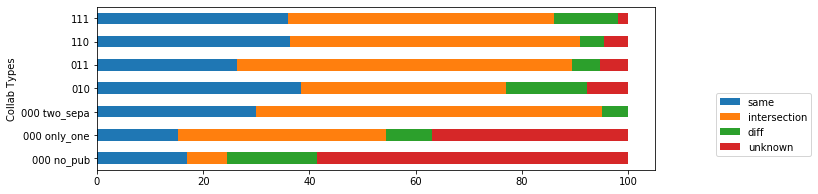

In [10]:
C = Counter(ctypes)
corder = ["000 no_pub", "000 only_one", "000 two_sepa", "010", "011", "110", "111"]
index = pd.Index(corder, name='Collab Types')
korder = ["same", "intersection", "diff", "unknown"]
data_c = {g:[] for g in korder}
for ct in corder:
    cnum = C[ct]
    if ct == "000 no_pub":
        tlist = Counter([dict_affiliations[gid] for gid in no_publications])
        for k in korder: data_c[k].append(100*tlist[k]/len(no_publications))
        cnum = len(no_publications)
    elif ct == "000 only_one":
        tlist = Counter([dict_affiliations[gid] for gid in only_one_pi])
        for k in korder: data_c[k].append(100*tlist[k]/len(only_one_pi))
        cnum = len(only_one_pi)
    elif ct == "000 two_sepa":
        tlist = Counter([dict_affiliations[gid] for gid in two_separate])
        for k in korder: data_c[k].append(100*tlist[k]/len(two_separate))
        cnum = len(two_separate)
    else:
        tlist = Counter([dict_affiliations[gid] for gid, t in collab_type.items() if t == ct])
        for k in korder: data_c[k].append(100*tlist[k]/C[ct])
            
    print("Collab type:", ct, end=" -- ")
    print(["{} {} ({:.1f}%)".format(k, tlist[k], 100*tlist[k]/cnum) for k in korder])
    
df = pd.DataFrame(data_c, index=index)
ax = df.plot(kind='barh', stacked=True, figsize=(10, 3)).legend(bbox_to_anchor=(1.1, 0.5))

In [16]:
collab_type = {}
dict_period = {}
dict_amount = {}
dict_teams = {}
dict_publications = {}
dict_citations = {}
dict_affiliations = {}
dict_timestamps = {}
convert_t = lambda t: datetime.strptime(t, "%Y-%m-%dT%X")

for grant_id in grant_list:
    pi_affiliations = core.coworknet.get_pis_affiliation(grant_id, lifetime=True)    
    affiliation_type = None
    if len(pi_affiliations.values()) != 2:
        print("*** num of PIs != 2", grant_id)
        affiliation_type = "unknown"
    else:
        a_aff, b_aff = pi_affiliations.values()
        if len(a_aff) == 0 or len(b_aff) == 0:
            affiliation_type = "unknown"
        elif len(set(a_aff).intersection(set(b_aff))) > 0:
            affiliation_type = "intersection"
            if set(a_aff) == set(b_aff):
                affiliation_type = "same"
        else:
            affiliation_type = "diff"
        print("***", grant_id, affiliation_type)
    dict_affiliations[grant_id] = affiliation_type
    
    award,_,ts,te,G_all = core.coworknet.get_grant_coworknet_pis(grant_id)
    pis = [a for a in G_all.nodes() if "pi" in G_all.nodes[a] and G_all.nodes[a] ["pi"]]
    G = G_all.subgraph(pis)
    
    publications = {"pre-grant":0, "grant":0, "post-grant":0}
    citations = {"pre-grant":0, "grant":0, "post-grant":0}
    teams = {"pre-grant":0, "grant":0, "post-grant":0}
    dates = [convert_t(data["date"]) for _,_,data in G.edges.data()]
    for u,v,data in G.edges.data():
#         print(data["paper"])
        num_coauthor = len([e for e in G_all.edges.data() if e[2]["paper"] == data["paper"]])/2
#         print(data["paper"], num_coauthor)
        if data["grant"] != "other" or (ts <= convert_t(data["date"]) and convert_t(data["date"]) <= te):
#             print("grant") # reported publications or unreported pubs in the grant period
            teams["grant"] += num_coauthor
            publications["grant"] += 1
            citations["grant"] += data["citation"]
        elif convert_t(data["date"]) < ts:
#             print("pre-grant") # unreported publications before the grant period
            teams["pre-grant"] += num_coauthor
            publications["pre-grant"] += 1
            citations["pre-grant"] += data["citation"]
        elif te < convert_t(data["date"]):
#             print("post-grant") # unreported publications after the grant period
            teams["post-grant"] += num_coauthor
            publications["post-grant"] += 1
            citations["post-grant"] += data["citation"]
    dict_period[grant_id] = (te-ts).days
    dict_amount[grant_id] = award["awardAmount"]
    dict_teams[grant_id] = teams
    dict_publications[grant_id] = publications
    dict_citations[grant_id] = citations
    dict_timestamps[grant_id] = sorted(dates)
#     print(publications, dict_timestamps[grant_id])
    
ctypes = []
for gid, v in dict_publications.items():
    collab_type[gid] = "{}{}{}".format(1 if v["pre-grant"]>0 else 0, 1 if v["grant"]>0 else 0, 1 if v["post-grant"]>0 else 0)
    ctypes.append(collab_type[gid])
    
print(len([k for k in dict_timestamps.keys() if collab_type[k] != "000"]), "grants - two PIs collaborated")
print(Counter(ctypes))

Rajeev Alur - Affiliations: {1283103587, 95457486, 79576946, 97018004, 72090969, 2803209242, 1322087612}
George J. Pappas - Affiliations: {146367977, 122411786, 126345244, 95457486, 79576946, 165799507, 107639228}
*** 0401049 intersection
Andreas C. Cangellaris - Affiliations: {157725225}
[es_filter_papers_grant_range] no result
Narayan Aluru - Affiliations: set()
*** 0403020 unknown
Alper Buldum - Affiliations: {168864056, 110152177, 114027177}
Liming Dai - Affiliations: {27781120, 1299916419, 76130692, 58956616, 31746571, 1283473643, 48566637, 19820366, 110152177, 127591826, 118347636, 241749, 1292875679}
*** 0403130 intersection
Yehea Ismail - Affiliations: {5388228, 80693520, 111979921, 57629906, 181401687, 1335490905}
Venkat Chandrasekhar - Affiliations: {99464096, 111979921, 28777354, 1294504835}
*** 0403590 intersection
Min-Feng Yu - Affiliations: {157725225, 201448701, 130701444, 204465549}
Dong Qian - Affiliations: {111979921, 63135867, 146367977, 162577319}
*** 0404001 diff
S

Rajeev Motwani - Affiliations: {74973139, 97018004, 1290206253, 1324840837}
*** 0414762 intersection
Richard Cole - Affiliations: {57206974, 36672615}
Dennis E. Shasha - Affiliations: {1283103587, 36672615, 1326498283, 86519309, 124055696, 151746483, 35440088, 83467386, 57206974}
*** 0414763 intersection
Mukesh Singhal - Affiliations: {143302722, 1341412227, 156087764, 2803209242, 1311060795, 52357470}
D. Manivannan - Affiliations: {143302722}
*** 0414791 intersection
Zbigniew W. Ras - Affiliations: {99542240, 114027177, 75027704, 102149020, 108403487}
Alicja Wieczorkowska - Affiliations: {40413290, 102149020, 169333911}
*** 0414815 intersection
Penny Rheingans - Affiliations: {79272384, 36253440, 1302368450, 1299303238, 1309191912, 114027177, 126744593, 66946132, 6059380, 368840534}
Marie desJardins - Affiliations: {1298353152, 79272384, 1279667971, 126744593, 66946132, 6059380}
*** 0414976 intersection
Weiyi Meng - Affiliations: {157725225, 1327163397, 123946342, 39422238}
Madhusudha

Samuel P. Midkiff - Affiliations: {204250578, 1341412227, 219193219}
*** 0429535 intersection
Warren Hunt - Affiliations: {129801699}
J Strother Moore - Affiliations: {86519309}
*** 0429591 diff
Chita R. Das - Affiliations: {130769515, 45438204}
Narayanan Vijaykrishnan - Affiliations: {130769515}
*** 0429631 intersection
Eric Van Wyk - Affiliations: {130238516, 40120149, 126307644}
Mats Per Erik Heimdahl - Affiliations: {130238516}
*** 0429640 intersection
J. Bernholc - Affiliations: {1341412227, 1289243028, 923382979, 137902535}
Frank Mueller - Affiliations: {192389796, 137902535, 39343248, 1282311441, 8248082, 139351228, 103163165}
*** 0429653 intersection
Sanjay Jeram Patel - Affiliations: {157725225}
Matthew I. Frank - Affiliations: {157725225, 135310074, 1343180700, 63966007}
*** 0429711 intersection
Vishwani D. Agrawal - Affiliations: {1283103587, 1334257032, 1343180700, 17301866, 31712429, 82497590, 72090969, 1322087612, 102322142}
[es_filter_papers_grant_range] no result
Michae

Kenneth Zeger - Affiliations: {157725225, 154570441, 161318765, 36258959, 1331384533}
Alexander Vardy - Affiliations: {1341412227, 157725225, 29607241, 122411786, 95457486, 36258959, 16391192, 172675005}
*** 0431177 intersection
Nataša Jonoska - Affiliations: {2613432, 123946342}
Nadrian C. Seeman - Affiliations: {219193219, 55732556, 181190671, 84909340, 57206974}
*** 0432009 diff
John H. Reif - Affiliations: {170897317, 190082696, 114027177, 185163786, 106165777, 138689650, 74973139, 173911158, 170164250, 57206974}
Thomas H. LaBean - Affiliations: {55732556, 170897317, 137902535}
*** 0432038 intersection
Herman A. Dierick - Affiliations: {181547552, 111979921, 186667990}
Ralph J. Greenspan - Affiliations: {6902469, 36258959, 186667990, 32610072, 57206974}
*** 0432063 intersection
Mohammed Javeed Zaki - Affiliations: {110200422, 165799507, 5388228, 28200790}
Christopher Bystroff - Affiliations: {165799507, 201448701, 180670191}
*** 0432098 intersection
John Sherman - Affiliations: {16

Raya Fidel - Affiliations: {201448701}
Jens-Erik Jørgensen - Affiliations: {204337017}
*** 0440021 diff
Kofi Edee - Affiliations: {169645620}
Scott D. Lathrop - Affiliations: {1331164456, 27837315, 192545095}
*** 0440133 diff
Mung Chiang - Affiliations: {177725633, 20089843, 97018004, 1290206253}
[es_filter_papers_grant_range] no result
Arthur R. Calderbank - Affiliations: set()
*** 0440443 unknown
Michael Lesk - Affiliations: {102322142}
Aleksandra Sarcevic - Affiliations: {72816309, 102322142}
*** 0441172 intersection
David Stark - Affiliations: {78577930, 39555362, 205783295}
[es_filter_papers_grant_range] no result
Vedres Andras - Affiliations: set()
*** 0441999 unknown
Pat Langley - Affiliations: {97018004, 55732556, 154130895}
Stephen D. Bay - Affiliations: {97018004}
*** 0442128 intersection
David L. Waltz - Affiliations: {78577930, 1341412227, 6902469, 20089843}
Yoav Freund - Affiliations: {1283103587, 1334257032, 78577930, 1290206253, 36258959, 16391192, 72090969, 197251160, 1

### Affiliations of PIs in the entire period

Collab type: *0* -- ['same 7 (5.4%)', 'intersection 62 (48.1%)', 'diff 33 (25.6%)', 'unknown 27 (20.9%)']
Collab type: *1* -- ['same 10 (8.5%)', 'intersection 97 (82.9%)', 'diff 8 (6.8%)', 'unknown 2 (1.7%)']


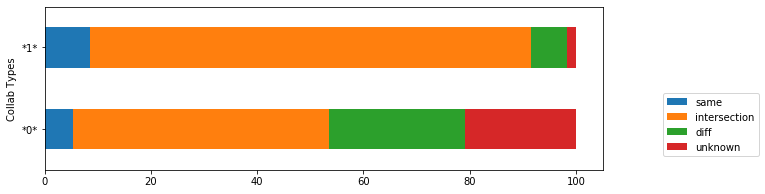

In [17]:
C = Counter(ctypes)
corder = ["*0*", "*1*"]
index = pd.Index(corder, name='Collab Types')
korder = ["same", "intersection", "diff", "unknown"]
data_c = {g:[] for g in korder}
for ct in corder:
    print("Collab type:", ct, end=" -- ")
    tlist = Counter([dict_affiliations[gid] for gid, t in collab_type.items() if t[1] == ct[1]])
    tnum = 0
    for c, v in C.items():
        if c[1] == ct[1]:
            tnum += v
    print(["{} {} ({:.1f}%)".format(k, tlist[k], 100*tlist[k]/tnum) for k in korder])
    for k in korder:
        data_c[k].append(100*tlist[k]/tnum)
df = pd.DataFrame(data_c, index=index)
ax = df.plot(kind='barh', stacked=True, figsize=(10, 3)).legend(bbox_to_anchor=(1.1, 0.5))

Collab type: 000 no_pub -- ['same 3 (5.7%)', 'intersection 16 (30.2%)', 'diff 21 (39.6%)', 'unknown 13 (24.5%)']
Collab type: 000 only_one -- ['same 2 (4.3%)', 'intersection 25 (54.3%)', 'diff 9 (19.6%)', 'unknown 10 (21.7%)']
Collab type: 000 two_sepa -- ['same 2 (10.0%)', 'intersection 18 (90.0%)', 'diff 0 (0.0%)', 'unknown 0 (0.0%)']
Collab type: 010 -- ['same 2 (7.7%)', 'intersection 19 (73.1%)', 'diff 4 (15.4%)', 'unknown 1 (3.8%)']
Collab type: 011 -- ['same 1 (5.3%)', 'intersection 17 (89.5%)', 'diff 1 (5.3%)', 'unknown 0 (0.0%)']
Collab type: 110 -- ['same 0 (0.0%)', 'intersection 21 (95.5%)', 'diff 0 (0.0%)', 'unknown 1 (4.5%)']
Collab type: 111 -- ['same 7 (14.0%)', 'intersection 40 (80.0%)', 'diff 3 (6.0%)', 'unknown 0 (0.0%)']


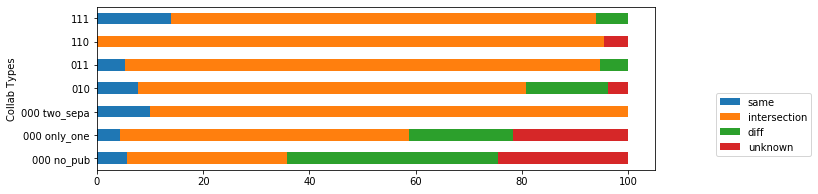

In [18]:
C = Counter(ctypes)
corder = ["000 no_pub", "000 only_one", "000 two_sepa", "010", "011", "110", "111"]
index = pd.Index(corder, name='Collab Types')
korder = ["same", "intersection", "diff", "unknown"]
data_c = {g:[] for g in korder}
for ct in corder:
    cnum = C[ct]
    if ct == "000 no_pub":
        tlist = Counter([dict_affiliations[gid] for gid in no_publications])
        for k in korder: data_c[k].append(100*tlist[k]/len(no_publications))
        cnum = len(no_publications)
    elif ct == "000 only_one":
        tlist = Counter([dict_affiliations[gid] for gid in only_one_pi])
        for k in korder: data_c[k].append(100*tlist[k]/len(only_one_pi))
        cnum = len(only_one_pi)
    elif ct == "000 two_sepa":
        tlist = Counter([dict_affiliations[gid] for gid in two_separate])
        for k in korder: data_c[k].append(100*tlist[k]/len(two_separate))
        cnum = len(two_separate)
    else:
        tlist = Counter([dict_affiliations[gid] for gid, t in collab_type.items() if t == ct])
        for k in korder: data_c[k].append(100*tlist[k]/C[ct])
            
    print("Collab type:", ct, end=" -- ")
    print(["{} {} ({:.1f}%)".format(k, tlist[k], 100*tlist[k]/cnum) for k in korder])
    
df = pd.DataFrame(data_c, index=index)
ax = df.plot(kind='barh', stacked=True, figsize=(10, 3)).legend(bbox_to_anchor=(1.1, 0.5))